In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:\Raju\Project\Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Figure size 1000x600 with 0 Axes>

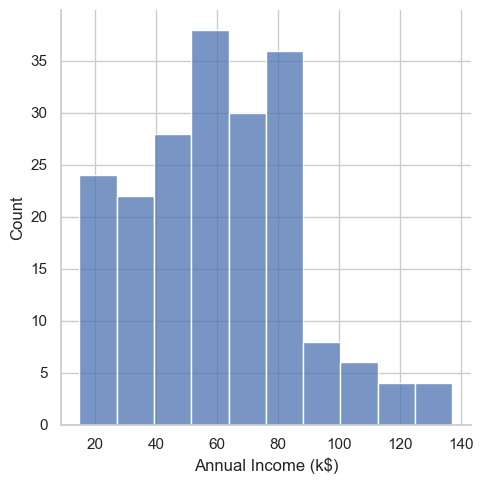

In [5]:
plt.figure(figsize=(10,6))
sns.set(style=('whitegrid'))
sns.displot(data["Annual Income (k$)"])

<Figure size 1000x600 with 0 Axes>

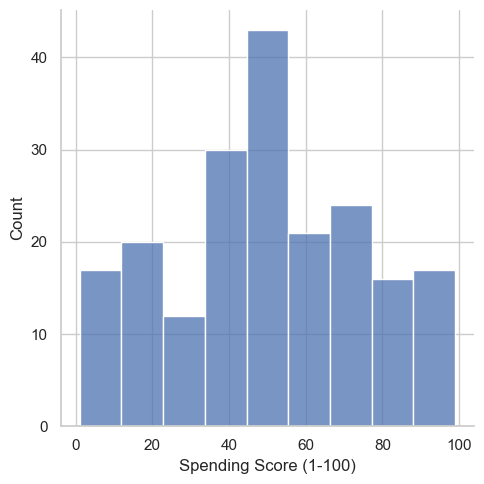

In [6]:
plt.figure(figsize=(10,6))
sns.set(style=('whitegrid'))
sns.displot(data["Spending Score (1-100)"])

In [8]:
x=data[["Annual Income (k$)","Spending Score (1-100)"]]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [9]:
x.corr()

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,0.009903
Spending Score (1-100),0.009903,1.000000


Text(0.5, 1.0, 'Spending Score (1-100) vs Annual Income (k$)')

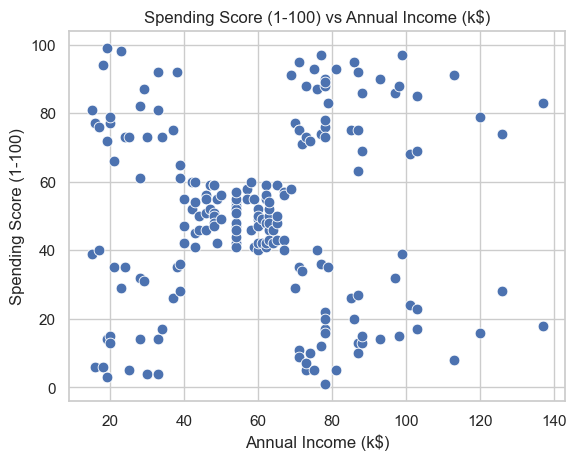

In [10]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=x,s=60)
plt.title("Spending Score (1-100) vs Annual Income (k$)")

In [11]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [12]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

C:\Users\Abi Paramban\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
print(wcss)

[269981.28, 183154.57952156942, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37455.98455516028, 30273.394312070042, 25029.25342493588, 21850.165282585636, 19724.413115962052]


([<matplotlib.axis.XTick at 0x19cc4729070>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

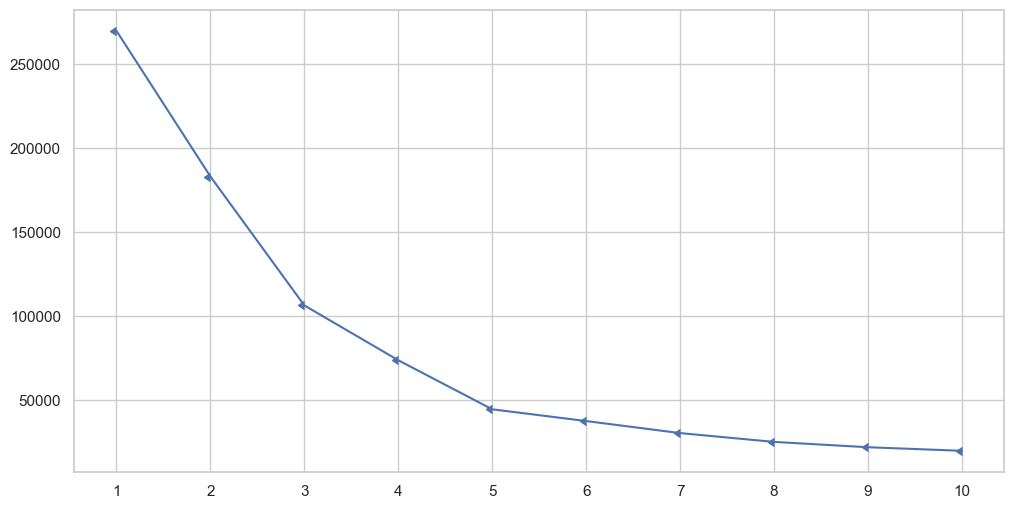

In [14]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,marker=8)
plt.xticks(ticks=range(1,11))

In [33]:
km1=KMeans(n_clusters=5,random_state=42)
km1.fit(x)
y=km1.predict(x)
data["Groups"]=y
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Groups
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

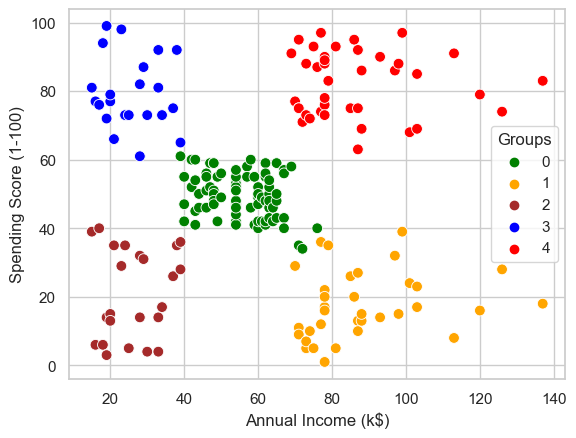

In [16]:
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="Groups",palette=['green','orange','brown','blue','red'], legend='full',data=data,s = 60 )

In [32]:
count=[]
for i in range(0,5):
    group=data[data["Groups"]==i]
    t=len(group)
    count.append(t)
print(count)

[81, 35, 23, 22, 39]


In [40]:
data1=pd.read_excel("C:\Raju\Project\Mall_Customers1.xlsx",index_col=0)
data1.head()

,Type,Count
Medium Income & Medium Spending,0,81
High Income & Low Spending,1,35
Low Income & Low Spending,2,23
Low Income & High Spending,3,22
High Income & High Spending,4,39


<BarContainer object of 5 artists>

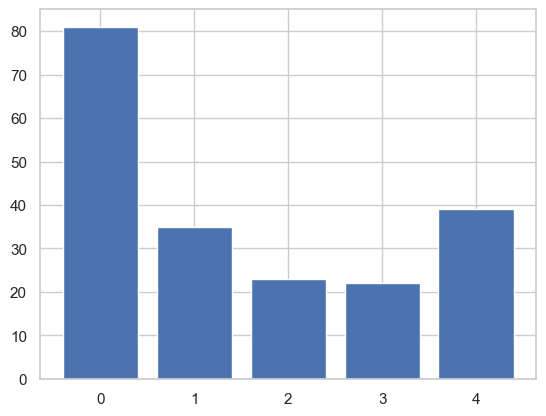

In [41]:
plt.bar(data1["Type"],data1["Count"])